# Machine Learning

## Submission Date: 19/12/2022

## Points: 5

<font color='blue'> keywords:<font color='black'> 
    
**Tasks:** regression, classification, clustering  
**Algorithms:** linear regression, logistic regression, random forest, SVM, k-means  
**Evaluation Measures:** RMSE, precision, recall, F1-score  
**Concepts:** training and testing
**R packages used:** tidyverse, rpart, randomForest, e1071, caret, mice, mltest  
  
  
    
The goal of this lab session is to get familar with various machine learning based tasks in R. Many packages in R have similar interface that uses a formula and other parameters.

**formula:** is a way to express the form of a model. For example, suppose you have a response variable y and independent variables x1, x2 and x3. To express that y depends linearly on x1, x2 and x3 you would use the formula `y ~ x1 + x2 + x3.`

# Supervised Learning

[Supervised learning](https://en.wikipedia.org/wiki/Supervised_learning) is the machine learning task of inferring a function from labeled data.

## Regression
[Regression](https://en.wikipedia.org/wiki/Regression_analysis) is the processes to estimate the relationships between a dependent variable (often called the 'outcome variable') and one or more independent variables (often called 'predictors', 'covariates', or 'features')

**Linear Regression**

We will use the `lm()` function in the `stats` package which is part of base R. No external package needed.

    lm_model <- lm(y ∼ x1 + x2, data=mydata)
    summary(lm_model)

The vector of coefficients for the model is contained in `lm_model$coefficients.`

**Example**: We will start with building a simple model using the `cars` dataset that comes with R. The dataset contains the speed of cars and the distances taken to stop. In this example, we will build a linear regression model with only a **single feature**, i.e. to compute `dist` from `speed.`

In [1]:
# view some first rows of the dataset
head(cars)

,speed,dist
,<dbl>,<dbl>
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16
6,9,10


In [2]:
options(repr.plot.width=10, repr.plot.height=6)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


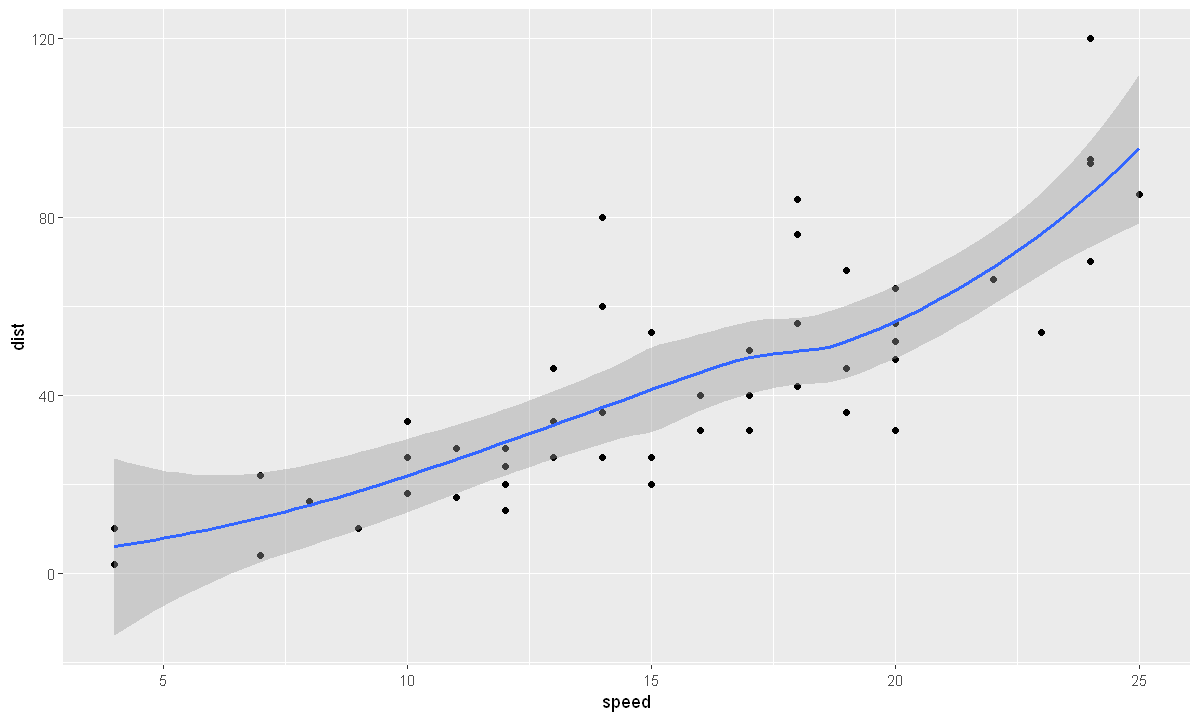

In [3]:
# now, lets visually examine the data

# load the required packages for plotting
library(tidyverse)
# draw the scatter plot between 'speed' and 'dist'
ggplot(data = cars, mapping = aes(x = speed, y = dist)) +
    geom_point() +
    geom_smooth()

**The above plot suggests that 'dist' can be computed from 'speed' through a linear function**

In [4]:
# fit a linear regression model
cars_lm <- lm(dist ~ speed, data = cars)

**Understanding the fitted model**

In [5]:
## summary of fitted model
summary(cars_lm)


Call:
lm(formula = dist ~ speed, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
speed         3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


**Using the fitted model for prediction**

In [6]:
# example unseen data
df <- data.frame('speed' = c(2,3,4,7))
# prediction
predict(cars_lm, newdata = df)

1         2         3         4 
-9.714277 -5.781869 -1.849460  9.947766

**Example**: We will use another dataset that comes with R, `mtcars`, to build a model with **multiple features** to predict the fuel consumption `mpg.` The features describe different aspects of an automobile design and performance. We will also explore **which features to use**.

In [7]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [8]:
# Use the dataset mtcars to create a linear regression model to predict `mpg` using `wt, qsec, am` and `carb`. 
mtcars_lm <- lm(mpg ~ wt + qsec + am + carb, data = mtcars)
summary(mtcars_lm)


Call:
lm(formula = mpg ~ wt + qsec + am + carb, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1184 -1.5414 -0.1392  1.2917  4.3604 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  12.8972     7.4725   1.726 0.095784 .  
wt           -3.4343     0.8200  -4.188 0.000269 ***
qsec          1.0191     0.3378   3.017 0.005507 ** 
am            3.5114     1.4875   2.361 0.025721 *  
carb         -0.4886     0.4212  -1.160 0.256212    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.444 on 27 degrees of freedom
Multiple R-squared:  0.8568,	Adjusted R-squared:  0.8356 
F-statistic: 40.39 on 4 and 27 DF,  p-value: 5.064e-11


## Classification

[Classification](https://en.wikipedia.org/wiki/Statistical_classification) is the problem of determining label(s) (e.g., categories or clasesses, etc.) of each data observation based on learning from labeled data.

### Widely used (shallow) classification models

[**Logistic Regression**](https://en.wikipedia.org/wiki/Logistic_regression)

Provided in `stats` package, which is automatically loaded when starting R  

    glm_model <- glm(y ∼ x1 + x2, family = binomial, data = mydata)  

[**K-Nearest Neighbor**](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)

Install and load the `class` package

    knn_model <- knn(train=X_train, test=X_test, cl=as.factor(labels), k=K)
    
`knn_model` is a factor vector of class attributes for the test set.

[**Decision Trees (CART)**](https://en.wikipedia.org/wiki/Decision_tree_learning)

Install and load the `rpart` package.

    cart_model <- rpart(y ∼ x1 + x2, data=mydata, method="class")
 
You can use `plot.rpart` and `text.rpart` to plot the decision tree

[**Random Forest**](https://en.wikipedia.org/wiki/Random_forest)

Install and load the `randomForest` package


    rf_model <- randomForest(y ~ x1 + x2, data=train, importance=TRUE, ntree=50)


[**Support Vector Machines (SVM)**](https://en.wikipedia.org/wiki/Support-vector_machine)

Install and load the `e1071` package.

    svm_model <- svm(x=X, y=as.factor(labels), kernel ="radial", cost=C)

**Example**: we will use the above models to predict `survivors` in the [Titanic dataset](https://www.kaggle.com/c/titanic). The dataset also provided in `titanic.csv`

In [11]:
# load, view data examples, and summarize the dataset
titanic <- read_csv('titanic.csv', skip=5)
head(titanic)
summary(titanic)

Rows: 1309 Columns: 12
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Name, Sex, Ticket, Cabin, Embarked
dbl (7): PassengerId, Pclass, Age, SibSp, Parch, Fare, Survived

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
1,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S,0
6,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,NA,Q,0


  PassengerId       Pclass          Name               Sex           
 Min.   :   1   Min.   :1.000   Length:1309        Length:1309       
 1st Qu.: 328   1st Qu.:2.000   Class :character   Class :character  
 Median : 655   Median :3.000   Mode  :character   Mode  :character  
 Mean   : 655   Mean   :2.295                                        
 3rd Qu.: 982   3rd Qu.:3.000                                        
 Max.   :1309   Max.   :3.000                                        
                                                                     
      Age            SibSp            Parch          Ticket         
 Min.   : 0.17   Min.   :0.0000   Min.   :0.000   Length:1309       
 1st Qu.:21.00   1st Qu.:0.0000   1st Qu.:0.000   Class :character  
 Median :28.00   Median :0.0000   Median :0.000   Mode  :character  
 Mean   :29.88   Mean   :0.4989   Mean   :0.385                     
 3rd Qu.:39.00   3rd Qu.:1.0000   3rd Qu.:0.000                     
 Max.   :80.00   Max.   :8

**Note**: most models do not work with `character` type, we need to convert strings to factors for later use

In [12]:
titanic$Sex <- as.factor(titanic$Sex)
titanic$Cabin <- as.factor(titanic$Cabin)
titanic$Embarked <- as.factor(titanic$Embarked)
titanic$Survived <- as.factor(titanic$Survived)

**Training and Testing data**

split the titanic data into training and testing sets based on the feature we want to predict `Survived`.

In [13]:
titanic_training <- filter(titanic, !is.na(Survived))
dim(titanic_training)
titanic_testing <- filter(titanic, is.na(Survived))
dim(titanic_testing)

[1] 891  12

[1] 418  12

In [14]:
# check if there is missing value in training data
summary(titanic_training)

  PassengerId        Pclass          Name               Sex     
 Min.   :  1.0   Min.   :1.000   Length:891         female:314  
 1st Qu.:223.5   1st Qu.:2.000   Class :character   male  :577  
 Median :446.0   Median :3.000   Mode  :character               
 Mean   :446.0   Mean   :2.309                                  
 3rd Qu.:668.5   3rd Qu.:3.000                                  
 Max.   :891.0   Max.   :3.000                                  
                                                                
      Age            SibSp           Parch           Ticket         
 Min.   : 0.42   Min.   :0.000   Min.   :0.0000   Length:891        
 1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000   Class :character  
 Median :28.00   Median :0.000   Median :0.0000   Mode  :character  
 Mean   :29.70   Mean   :0.523   Mean   :0.3816                     
 3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000                     
 Max.   :80.00   Max.   :8.000   Max.   :6.0000                   

In [15]:
# check if there is missing value in test data
summary(titanic_testing)

  PassengerId         Pclass          Name               Sex     
 Min.   : 892.0   Min.   :1.000   Length:418         female:152  
 1st Qu.: 996.2   1st Qu.:1.000   Class :character   male  :266  
 Median :1100.5   Median :3.000   Mode  :character               
 Mean   :1100.5   Mean   :2.266                                  
 3rd Qu.:1204.8   3rd Qu.:3.000                                  
 Max.   :1309.0   Max.   :3.000                                  
                                                                 
      Age            SibSp            Parch           Ticket         
 Min.   : 0.17   Min.   :0.0000   Min.   :0.0000   Length:418        
 1st Qu.:21.00   1st Qu.:0.0000   1st Qu.:0.0000   Class :character  
 Median :27.00   Median :0.0000   Median :0.0000   Mode  :character  
 Mean   :30.27   Mean   :0.4474   Mean   :0.3923                     
 3rd Qu.:39.00   3rd Qu.:1.0000   3rd Qu.:0.0000                     
 Max.   :76.00   Max.   :8.0000   Max.   :9.0000    

Predicting `Survived` based on `Pclass` and `Sex` using Logistic Regression

In [16]:
# train the model
titanic_glm <- glm(Survived ~ Pclass + Sex, data = titanic_training, family = binomial)

# examine the model
summary(titanic_glm)


Call:
glm(formula = Survived ~ Pclass + Sex, family = binomial, data = titanic_training)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2030  -0.7036  -0.4519   0.6719   2.1599  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   3.2946     0.2974  11.077   <2e-16 ***
Pclass       -0.9606     0.1061  -9.057   <2e-16 ***
Sexmale      -2.6434     0.1838 -14.380   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1186.7  on 890  degrees of freedom
Residual deviance:  827.2  on 888  degrees of freedom
AIC: 833.2

Number of Fisher Scoring iterations: 4


In [17]:
# Apply the trained model for predict the survivor in test set
titanic_testing$Survived <- predict(titanic_glm, titanic_testing, type="response") # Question: why type="response"
titanic_testing$Survived

1          2          3          4          5          6          7 
0.09705221 0.60180274 0.21928077 0.09705221 0.60180274 0.09705221 0.60180274 
         8          9         10         11         12         13         14 
0.21928077 0.60180274 0.09705221 0.09705221 0.42328329 0.91166115 0.21928077 
        15         16         17         18         19         20         21 
0.91166115 0.79795074 0.21928077 0.09705221 0.60180274 0.60180274 0.42328329 
        22         23         24         25         26         27         28 
0.09705221 0.91166115 0.42328329 0.91166115 0.09705221 0.91166115 0.09705221 
        29         30         31         32         33         34         35 
0.42328329 0.09705221 0.21928077 0.21928077 0.60180274 0.60180274 0.42328329 
        36         37         38         39         40         41         42 
0.09705221 0.60180274 0.60180274 0.09705221 0.09705221 0.09705221 0.42328329 
        43         44         45         46         47         48         49 
0.09705221 0.79795074 0.91166115 0.09705221 0.42328329 0.09705221 0.91166115 
        50         51         52         53         54         55         56 
0.60180274 0.42328329 0.21928077 0.79795074 0.91166115 0.21928077 0.09705221 
        57         58         59         60         61         62         63 
0.09705221 0.09705221 0.09705221 0.91166115 0.09705221 0.21928077 0.09705221 
        64         65         66         67         68         69         70 
0.60180274 0.42328329 0.79795074 0.60180274 0.42328329 0.42328329 0.91166115 
        71         72         73         74         75         76         77 
0.60180274 0.09705221 0.60180274 0.42328329 0.91166115 0.42328329 0.09705221 
        78         79         80         81         82         83         84 
0.91166115 0.21928077 0.60180274 0.09705221 0.42328329 0.42328329 0.09705221 
        85         86         87         88         89         90         91 
0.21928077 0.09705221 0.60180274 0.60180274 0.60180274 0.21928077 0.60180274 
        92         93         94         95         96         97         98 
0.09705221 0.91166115 0.09705221 0.42328329 0.09705221 0.91166115 0.09705221 
        99        100        101        102        103        104        105 
0.60180274 0.09705221 0.91166115 0.21928077 0.09705221 0.09705221 0.60180274 
       106        107        108        109        110        111        112 
0.09705221 0.09705221 0.09705221 0.09705221 0.21928077 0.21928077 0.60180274 
       113        114        115        116        117        118        119 
0.91166115 0.60180274 0.91166115 0.09705221 0.09705221 0.60180274 0.42328329 
       120        121        122        123        124        125        126 
0.79795074 0.79795074 0.09705221 0.91166115 0.09705221 0.09705221 0.60180274 
       127        128        129        130        131        132        133 
0.09705221 0.60180274 0.21928077 0.09705221 0.09705221 0.42328329 0.60180274 
       134        135        136        137        138        139        140 
0.09705221 0.09705221 0.09705221 0.09705221 0.21928077 0.60180274 0.09705221 
       141        142        143        144        145        146        147 
0.60180274 0.91166115 0.42328329 0.21928077 0.42328329 0.09705221 0.42328329 
       148        149        150        151        152        153        154 
0.09705221 0.42328329 0.21928077 0.91166115 0.09705221 0.09705221 0.60180274 
       155        156        157        158        159        160        161 
0.09705221 0.09705221 0.91166115 0.60180274 0.42328329 0.60180274 0.60180274 
       162        163        164        165        166        167        168 
0.09705221 0.79795074 0.09705221 0.21928077 0.60180274 0.42328329 0.09705221 
       169        170        171        172        173        174        175 
0.91166115 0.60180274 0.09705221 0.09705221 0.09705221 0.09705221 0.09705221 
       176        177        178        179        180        181        182 
0.79795074 0.79795074 0.4232832

### Exercise 1 -- 2 points

Train a `random forest` model for predicting  `Survived` based only on  `Pclass`, `Age` and `Sex`, then apply the model on test set

In [26]:
library('randomForest')
rf_model <- randomForest(Survived ~ Pclass + Age + Sex, data=titanic_training, importance=TRUE, ntree=50, na.action=na.roughfix)
summary(rf_model)




                Length Class  Mode     
call               6   -none- call     
type               1   -none- character
predicted        891   factor numeric  
err.rate         150   -none- numeric  
confusion          6   -none- numeric  
votes           1782   matrix numeric  
oob.times        891   -none- numeric  
classes            2   -none- character
importance        12   -none- numeric  
importanceSD       9   -none- numeric  
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            14   -none- list     
y                891   factor numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     

### Model Performance

#### Measures of goodness
We trained and applied some models to predict labels for un-labeled data, but how can we say if the model is good?

The goodness of prediction models are measured w.r.t some dataset with groudtruth -- i.e., we need the labels for observations in test data. Typical measures for the goodness of the classification models are [Precision, Recall](https://en.wikipedia.org/wiki/Precision_and_recall), and [F1 scores](https://en.wikipedia.org/wiki/F1_score)

**Example**: we will train a model and evaluate its performance using [Iris dataset](http://archive.ics.uci.edu/ml/machine-learning-databases/iris/)

In [ ]:
# read the dataset
iris <- read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', col_names = FALSE)

# name the columns
names(iris) <- c('sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class')

In [ ]:
# view some rows
head(iris)

# view columns's data type
str(iris)

In [ ]:
# convert `class` from string to factor
iris$class <- as.factor(iris$class)

To evaluate the models, often we **divide** the set of labeled data into **training and test sets**. The models will be **trained on the training set**, and **evaluated using the test set**

In [ ]:
# divide the iris dataset into: 80% for training set and the remaining 20% for test set 
training_size <- floor(0.8 * nrow(iris))
train_indexes <- sample(seq_len(nrow(iris)), size = training_size)
iris_train <- iris[train_indexes, ]
iris_test <- iris[-train_indexes, ]

Train a svm model to predict `class` from `sepal_length` and `sepal_width`

In [ ]:
# install and load the 'e1071' package if not yet
# install.packages('e1071')
library(e1071)

In [ ]:
# set the features
features <- c('sepal_length', 'sepal_width')
# train a svm model
svm_model <- svm(x=iris_train[features], y=iris_train$class, kernel ="linear", cost=1)

We now evaluate the trained model using the test set

In [ ]:
# install and load the 'mltest' package if not yet
# install.packages('mltest', repos = 'https://cran.r-project.org/')
library(mltest)

In [ ]:
# get the prediction
predicted_labels <- as.factor(predict(svm_model, iris_test[features]))

# get the groundtruth
true_labels <- as.factor(iris_test$class)

# measure the performance
classifier_metrics <- ml_test(predicted_labels, true_labels, output.as.table = FALSE)

In [ ]:
# overall classification accuracy
classifier_metrics$accuracy

In [ ]:
# precision for classes
classifier_metrics$precision

In [ ]:
# recall for classes
classifier_metrics$recall

In [ ]:
# F1-measures for classes
classifier_metrics$F1

### Exercise 2 -- 3 points

Divide the iris dataset into training and test sets by ratio 9:1.Then train an SVM model to predict `class` using all features, and examine the performance of the trained model

In [ ]:
# YOUR CODE GOES HERE

# divide the iris dataset into training and test sets by ratio 90:10

# set the features

# train a svm model


# get the prediction


# get the groundtruth


# measure the performance

# Unsupervised Learning

[Unsupervised machine learning](https://en.wikipedia.org/wiki/Unsupervised_learning) is the machine learning task of uncovering the hidden structure from "unlabeled" data.

**K-Means Clustering**
    
    kmeans_model <- kmeans(x=X, centers=m)

In this exercise, we will use movies data on the [MovieLens 100K Dataset](http://files.grouplens.org/datasets/movielens/ml-100k/u.item) collected from the [MovieLens web site](http://movielens.org). It is available in the file `movies.txt`.

In [ ]:
movies <- read_delim('movies.txt', delim = '|')

In [ ]:
# Inspecting and preprocessing

# check top records
head(movies)

# remove duplicates
movies <- distinct(movies)

# Mow many movies are tagged as Comedy
filter(movies, Comedy == 1) %>% count()

# How many movies are tagged as Romance and Drama?
filter(movies, Romance == 1 & Drama == 1) %>% count()

In [ ]:
# building a k-means cluster
k = 5
iters = 1000
set.seed(1)

movies <- select(movies, -Title)
movie_kmeans <- kmeans(movies, centers = k, iter.max=iters)

**Understanding Clustering Output**

In [ ]:
# view clustering output
str(movie_kmeans)

In [ ]:
# cluster vector, i.e., cluster index of each row
movie_kmeans$cluster

In [ ]:
# centroid values
movie_kmeans$centers

In [ ]:
# size of clusters, i.e., number of movies in each cluster
movie_kmeans$size

In [ ]:
# within-cluster sum of squares
movie_kmeans$withinss

**Determining number of clusters**

One way to select the number of clusters is by using a **scree plot**. A standard scree plot has the number of clusters on the x-axis, and the sum of the within-cluster sum of squares on the y-axis. The within-cluster sum of squares for a cluster is the sum, across all points in the cluster, of the squared distance between each point and the centroid of the cluster. To determine the best number of clusters using this plot, we want to look for a bend, or elbow, in the plot.

In [ ]:
set.seed(99)

# Call kmeans function with centers = 3, centers = 4, etc
num_clusters = seq(5, 15,1)

# within-cluster sum of squares for all clusters
sum_withinss = sapply(num_clusters, function(x) sum(kmeans(movies, centers=x, iter.max=2000)$withinss))

# visualize
ggplot(mapping = aes(x=num_clusters, y=sum_withinss)) +
    geom_line() +
    geom_point()
    
# 12 seems like a good pick

# References

[Top 10 algorithms in data mining](http://www.cs.uvm.edu/~icdm/algorithms/10Algorithms-08.pdf)

[R for Statistical Learning](https://daviddalpiaz.github.io/r4sl/)

[The caret Package](http://topepo.github.io/caret/)

[Linear Regression: r-statistics.co](http://r-statistics.co/Linear-Regression.html)

[Tutorial: SVM in R](http://math.stanford.edu/~yuany/course/2015.fall/SVM_in_R.pdf)

[Artificial Neural Networks in R](https://rpubs.com/julianhatwell/annr)

[Cluster analysis in R: determine the optimal number of clusters](https://stackoverflow.com/questions/15376075/cluster-analysis-in-r-determine-the-optimal-number-of-clusters)